In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Discretización de un sistema LTI de segundo orden

In [8]:
# parámetros del sistema
m = 30
b = 20
k = 50

# Constantes de F. de transferencia
b1 = b/m
a1 = b1
b2 = k/m
a2 = b2
num = [b1, b2]
den = [1, b1, b2]

# F. de trasnferencia tiempo continuo
sys_c = signal.lti(num,den)

In [10]:
Ts = 0.1 # Periodo de muestreo

# respuesta escalon
Tfin = 16.0 #segundos
nTs = np.arange(0,Tfin,Ts)
t = np.arange(0,Tfin,Ts*0.1)
t, yc = signal.step(sys_c, T=t)

Aplicando métodos de discretización al sistema de tiempo continuo

In [14]:
sys_dzoh = signal.cont2discrete((num,den),Ts) # zero-order holder (zoh)
sys_dimp = signal.cont2discrete((num,den),Ts,method='impulse') # invarianza impulsional
sys_dtus = signal.cont2discrete((num,den),Ts,method='bilinear') # Tustin (transformación bilineal)

# Respuesta al escalon de cada sistema discretizado
n, yzoh = signal.dstep(sys_dzoh, n=len(nTs))
n, yimp = signal.dstep(sys_dimp, n=len(nTs))
n, ytus = signal.dstep(sys_dtus, n=len(nTs))

Graficando las respuestas

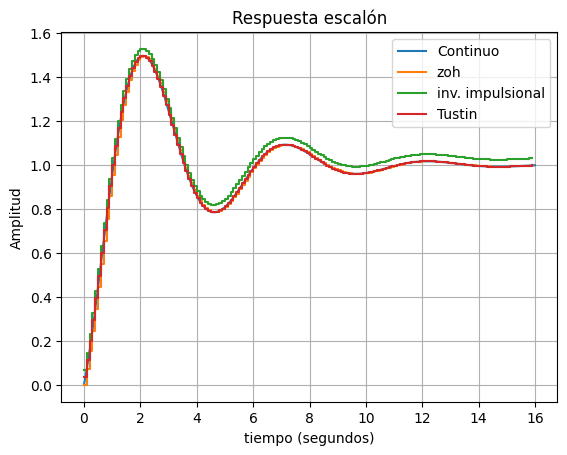

In [21]:
plt.figure(1)
plt.plot(t,yc,label='Continuo') # tiempo continuo
plt.step(n,np.squeeze(yzoh),label='zoh',where='post')
plt.step(n,np.squeeze(yimp),label='inv. impulsional',where='post')
plt.step(n,np.squeeze(ytus),label='Tustin',where='post')
plt.legend(loc='best')
plt.title("Respuesta escalón") 
plt.xlabel("tiempo (segundos)") 
plt.ylabel("Amplitud") 
plt.grid()
plt.show()